313549 ~ _Mateusz Zacharecki_ \
335719 ~ _Patrycja Kielan_

---

# Importing libraries and data exploration

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
X_train = pd.read_csv("Xtrain.csv", index_col = 0)
X_test = pd.read_csv("Xtest.csv", index_col = 0)
y_train = pd.read_csv("ytrain.csv", index_col = 0)

In [3]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,39.4504,-36.92070,0.59554,26.72000,0.51026,20.04030,-4.01032,-0.35019,-8.62273,4.08489,...,8.11935,-54.3521,-69.2989,67.4612,808.713,-1.69599,-15.09610,-23.79400,-56.64670,18.81780
1,44.6294,32.24200,48.20270,12.70680,-6.23816,-2.15168,-12.65270,-2.15707,8.05702,1.92893,...,-43.99900,120.1570,235.6390,41.0906,558.729,-3.61268,0.44842,56.90520,48.14110,1.85895
2,50.0798,67.63640,14.71330,2.85375,-68.63540,-21.08180,10.53940,-4.35703,8.63922,10.33920,...,52.08300,24.2549,-188.4310,-33.7800,1401.620,-8.66218,-209.63400,113.37300,-0.97479,-1.40396
3,49.0337,24.41310,13.66190,6.04321,-23.64840,-8.03995,12.92350,10.50930,-2.69219,10.87650,...,37.01180,121.0000,961.9150,19.5551,1816.060,1.60165,68.03790,-6.45159,-19.05600,-17.45370
4,47.4202,94.66190,-25.04520,-13.51140,-26.94340,0.08985,-28.89660,1.13134,6.06538,6.95015,...,63.88940,23.8658,159.9970,-36.3226,1620.090,-2.04414,43.19620,7.19877,4.03172,16.15410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191995,39.5413,-2.14904,10.42580,4.51382,-21.67410,0.01584,-19.27320,3.99861,9.27119,0.30660,...,-6.58301,81.3340,415.8160,113.8140,870.796,-35.21300,-203.10000,-90.84240,-246.11300,-20.59700
191996,46.3870,6.75163,18.79780,-13.55860,10.57470,-20.51100,-13.66010,-3.86509,0.02057,-1.18633,...,-5.83629,-24.5780,-60.3691,27.9501,532.398,18.53000,14.12930,118.26000,-0.61043,-92.62540
191997,43.7048,12.15960,-21.79750,23.35590,-12.87750,-27.13730,20.67340,6.74590,0.55247,9.01119,...,-14.70910,96.1221,25.5957,318.3460,741.260,-8.46091,12.12120,53.43420,49.40880,19.35790
191998,49.7784,14.04600,27.14470,0.07113,2.10461,-8.23532,-5.64012,4.05720,-6.50664,1.09561,...,42.52670,-23.4362,-252.3060,6.6854,982.688,20.18010,195.68900,-140.40300,-2.40628,4.88276


In [4]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,33.1409,43.3860,50.0680,18.54640,42.44670,1.47333,-8.77802,-4.49523,10.40240,4.23739,...,-69.75850,-406.34800,965.277,288.37500,618.885,-8.63526,-50.2682,139.1080,-120.23700,153.17800
1,40.9186,-21.3009,25.7074,13.67040,-32.57280,5.49977,6.83627,-10.88720,16.57250,1.59916,...,-22.40080,148.56800,-177.915,5.22135,1166.670,13.36000,309.8980,243.6750,-104.86200,83.59410
2,39.6318,-32.2569,26.3368,12.39270,1.32344,5.84791,2.22803,-2.47525,8.55482,-0.01806,...,-17.36340,-28.65900,-271.980,131.39900,667.768,14.35130,381.1260,76.8592,95.87170,51.82160
3,47.0109,43.9952,21.0747,-7.02443,-8.27133,-21.77560,-13.20940,-4.77895,6.86743,2.72689,...,-13.36210,171.58400,-355.299,38.82050,1948.970,33.91040,-110.2440,122.0040,-63.90920,12.92170
4,37.9243,-12.2480,22.6050,-2.57057,-23.61060,-1.05334,-14.96240,-4.69365,9.87572,0.44806,...,-31.67620,46.87650,243.750,-43.14330,778.144,-6.33509,-441.7930,-70.1538,-90.42510,23.76170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,50.0666,-13.1432,68.3980,29.75540,-16.37140,-15.54350,16.15370,-18.56830,-9.01333,-7.95337,...,40.14340,-194.01200,131.093,227.82600,814.409,7.89148,-224.8660,-99.1364,22.98280,-15.20370
47996,36.0169,-49.0458,-16.9659,-14.69750,-14.10570,-19.39390,-4.53950,-7.73771,0.92343,-0.26604,...,-53.03400,24.12760,1213.220,60.23750,855.873,-3.75863,-99.7317,20.5128,-33.05380,23.82880
47997,45.9437,-27.3187,67.8029,16.41180,-0.60343,0.50823,-7.94063,-4.50333,-0.95299,4.12457,...,0.37546,-8.72578,-122.387,10.40690,935.271,10.28770,-41.8637,28.2579,-66.52540,-115.21000
47998,47.1210,-18.7761,10.8836,23.30960,-29.82600,-11.11740,1.79419,-12.77320,14.60160,15.70000,...,-4.43891,57.71860,-174.187,40.95540,861.296,-0.31944,232.6420,29.8252,760.34300,24.30240


In [5]:
y_train

,0
0,2000
1,1996
2,2007
3,2005
4,1979
...,...
191995,1982
191996,2005
191997,2006
191998,2010


*Checking lack of data*

In [6]:
sum(X_train.isnull().any())

0

In [7]:
sum(X_test.isnull().any())

0

*Checking type of data*

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192000 entries, 0 to 191999
Data columns (total 100 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       192000 non-null  float64
 1   1       192000 non-null  float64
 2   2       192000 non-null  float64
 3   3       192000 non-null  float64
 4   4       192000 non-null  float64
 5   5       192000 non-null  float64
 6   6       192000 non-null  float64
 7   7       192000 non-null  float64
 8   8       192000 non-null  float64
 9   9       192000 non-null  float64
 10  10      192000 non-null  float64
 11  11      192000 non-null  float64
 12  12      192000 non-null  float64
 13  13      192000 non-null  float64
 14  14      192000 non-null  float64
 15  15      192000 non-null  float64
 16  16      192000 non-null  float64
 17  17      192000 non-null  float64
 18  18      192000 non-null  float64
 19  19      192000 non-null  float64
 20  20      192000 non-null  float64
 21  21      1

In [9]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,...,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000,192000.000000
mean,43.380151,1.335245,8.727282,1.162347,-6.524791,-9.517274,-2.420328,-1.799545,3.740869,1.874676,...,0.237200,4.288117,78.517426,41.257356,910.620018,1.341146,78.362482,25.684456,15.007085,0.271338
std,6.063208,51.514687,35.256368,16.290853,22.859312,12.892066,14.621339,7.957465,10.589640,6.510137,...,49.312749,228.803617,471.795687,121.557643,477.955746,22.190306,471.865133,121.801383,162.257953,48.949902
min,1.749000,-337.092000,-291.023000,-154.184000,-181.953000,-81.794300,-188.214000,-64.920600,-126.479000,-41.631700,...,-813.635000,-5493.500000,-13795.900000,-1810.690000,12.150400,-258.215000,-14861.700000,-2075.490000,-2782.930000,-1060.050000
25%,39.942100,-25.977700,-11.413900,-8.489640,-20.596675,-18.468000,-10.796825,-6.477045,-2.294328,-2.439967,...,-21.706650,-91.082150,-113.366000,-20.777500,605.859500,-8.816662,-114.235250,-23.702500,-59.931800,-21.707400
50%,44.250750,8.508885,10.559350,-0.674055,-6.014210,-11.179250,-2.097120,-1.751800,3.820330,1.774645,...,1.716795,11.640000,74.780900,28.756500,817.235500,0.075115,74.609450,31.609800,7.470180,1.617575
75%,47.831725,36.061650,29.796975,8.824573,7.761480,-2.377623,6.497150,2.913502,9.997262,6.108733,...,23.725300,103.539250,282.700250,89.276800,1099.062500,9.657102,281.537250,85.666900,84.439525,23.645525
max,61.970100,384.066000,322.851000,191.789000,223.496000,166.237000,152.137000,84.472800,146.298000,44.710100,...,906.469000,4741.180000,6021.400000,3210.700000,19865.900000,677.900000,8965.640000,2021.700000,3277.630000,973.053000


*Spearman correlation*

In [ ]:
X_train.corr(method="spearman").style.background_gradient(cmap='coolwarm')

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

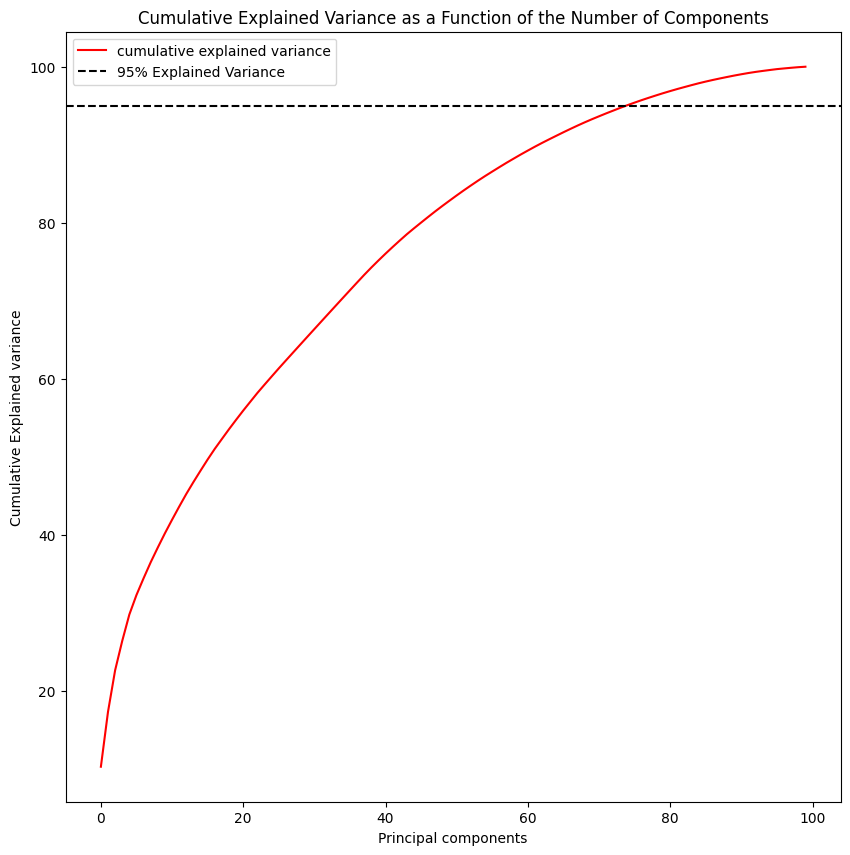

In [12]:
pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

*PCA for 95% of explained variance*

In [13]:
pca95 = PCA(.95)
pca95.fit(X_train_scaled)
shape = pd.DataFrame(pca95.transform(X_train_scaled)).shape[1]

*Outliers*

In [15]:
q1 = X_train.quantile(0.25) # wartości zmiennej na granicy pierwszego i drugiego kwartyla
q3 = X_train.quantile(0.75) # wartości zmiennej na granicy trzeciego i czwartego kwartyla
iqr = q3 - q1 # rozstęp międzykwartylowy

In [16]:
iqr

0       7.889625
1      62.039350
2      41.210875
3      17.314213
4      28.358155
         ...    
95     18.473765
96    395.772500
97    109.369400
98    144.371325
99     45.352925
Length: 100, dtype: float64

In [18]:
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (X_train[iqr.index] < low_boundary).sum()
num_of_outliers_U = (X_train[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

In [19]:
outliers_15iqr

,lower_boundary,upper_boundary,num_of_outliers_L,num_of_outliers_U
0,28.107663,59.666162,3944,8
1,-119.036725,129.120675,5111,363
2,-73.230213,91.613287,3470,2419
3,-34.460959,34.795891,1787,6575
4,-63.133907,50.298712,2021,1929
...,...,...,...,...
95,-36.527310,37.367750,5752,9137
96,-707.894000,875.196000,6928,6905
97,-187.756600,249.721000,7974,4495
98,-276.488788,300.996512,5583,7719
